# Imports

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from itertools import combinations 
import scipy.stats as stats
import scipy
from scipy.stats import ttest_ind
from scipy.stats import fisher_exact

# autoreload
%load_ext autoreload
%autoreload 2

import warnings  #This filters out future warnings
warnings.filterwarnings('ignore') 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

In [101]:
# This is a neat line to put at the end of a graph to send a copy to your folder
# plt.savefig('name_of_graph.png', bbox_inches='tight')

# Hypothesis test. ( A reminder )

Null Hypothesis (H0): There is no significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

Alternative Hypothesis (Ha): There is a significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

# Import the DataFrame

In [102]:
cardio = pd.read_csv('../data/Cardiovascular_cleaned.csv')
cardio.shape

(308854, 19)

In [103]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [104]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Changing the DataFrame. Details below. 

In [118]:
# Convert 'Sex' column values to lowercase
cardio['Sex'] = cardio['Sex'].str.lower()

# Create new binary columns for 'Male' and 'Female'
cardio['Male'] = (cardio['Sex'] == 'male').astype(int)
cardio['Female'] = (cardio['Sex'] == 'female').astype(int)

# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease', 'Sex'])  # Independent variables


In [119]:
cardio.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Average_Age
0,0,0,0,0,0,1,female,150.0,32.66,14.54,...,1,0,0,1,0,0,0,0,0,72.0
1,0,1,0,0,0,0,female,165.0,77.11,28.29,...,0,1,0,0,0,1,0,1,0,72.0
2,1,0,0,0,0,0,female,163.0,88.45,33.47,...,0,1,0,0,0,1,0,1,0,62.0
3,1,1,0,0,0,0,male,180.0,93.44,28.73,...,1,0,0,0,0,1,0,1,0,77.0
4,0,0,0,0,0,0,male,191.0,88.45,24.37,...,0,0,0,0,0,1,0,0,0,85.0


## Changes Sex column to binary with Male=1 and Female=0

In [107]:
# Convert 'Female' and 'Male' in the 'Sex' column to 0 and 1, respectively
#cardio['Sex'] = cardio['Sex'].replace({'Female': 0, 'Male': 1})

## Takes columns with (yes / no ) and changes them to 1=Yes and 0=No

In [108]:
# Map binary categorical variables to 0 and 1
binary_cols = ['Heart_Disease', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']
cardio[binary_cols] = cardio[binary_cols].replace({'No': 0, 'Yes': 1})

# Confirm the encoding
print(cardio[binary_cols].head())

   Heart_Disease  Exercise  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0              0         0            0             0           0          1   
1              1         0            0             0           0          0   
2              0         1            0             0           0          0   
3              1         1            0             0           0          0   
4              0         0            0             0           0          0   

   Smoking_History  
0                1  
1                0  
2                0  
3                0  
4                1  


### head() to see results

In [109]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Male,Female
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,female,...,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,0,1
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,female,...,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,0,1
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,female,...,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0,1
3,Poor,Within the past year,1,1,0,0,0,Yes,0,male,...,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,1,0
4,Good,Within the past year,0,0,0,0,0,No,0,male,...,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,1,0


### Changes columns General Health , Diabetes, and Checkup from object to binary columns with get-dummies

In [110]:
# Apply one-hot encoding to 'General_Health', 'Checkup', and 'Diabetes' columns
cardio = pd.get_dummies(cardio, columns=['General_Health', 'Checkup', 'Diabetes'], drop_first=True)

# Verify the DataFrame after preprocessing
print(cardio.head())

   Exercise  Heart_Disease  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0         0              0            0             0           0          1   
1         0              1            0             0           0          0   
2         1              0            0             0           0          0   
3         1              1            0             0           0          0   
4         0              0            0             0           0          0   

      Sex Age_Category  Height_(cm)  Weight_(kg)  ...  General_Health_Good  \
0  female        70-74        150.0        32.66  ...                    0   
1  female        70-74        165.0        77.11  ...                    0   
2  female        60-64        163.0        88.45  ...                    0   
3    male        75-79        180.0        93.44  ...                    0   
4    male          80+        191.0        88.45  ...                    1   

   General_Health_Poor  General_Health_Very Good  

### Changes Age_Category to Average_Age

In [111]:
Average_Age = []
for number in cardio['Age_Category']:
    if '-' in number:
        new = number.split('-')
        Average_Age.append((int(new[0]) + int(new[1])) / 2)
    else: 
        Average_Age.append(85)

cardio['Average_Age'] = Average_Age

cardio = cardio.drop(columns = 'Age_Category')

'''
Due to the last age group being 80+ with no upper limit I guessed and 
put the highest age at 85. This my impact things at the highest age range
'''

'\nDue to the last age group being 80+ with no upper limit I guessed and \nput the highest age at 85. This my impact things at the highest age range\n'

In [112]:
# cardio['Average_Age'] = Average_Age

In [113]:
# cardio = cardio.drop(columns = 'Age_Category')

In [114]:
cardio.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Average_Age
0,0,0,0,0,0,1,female,150.0,32.66,14.54,...,1,0,0,1,0,0,0,0,0,72.0
1,0,1,0,0,0,0,female,165.0,77.11,28.29,...,0,1,0,0,0,1,0,1,0,72.0
2,1,0,0,0,0,0,female,163.0,88.45,33.47,...,0,1,0,0,0,1,0,1,0,62.0
3,1,1,0,0,0,0,male,180.0,93.44,28.73,...,1,0,0,0,0,1,0,1,0,77.0
4,0,0,0,0,0,0,male,191.0,88.45,24.37,...,0,0,0,0,0,1,0,0,0,85.0


# Everything is now a number. Onward to the Logistic Regression! Huzzah!

## ...but first a few graphs

array([[<Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Heart_Disease'}>,
        <Axes: title={'center': 'Skin_Cancer'}>,
        <Axes: title={'center': 'Other_Cancer'}>,
        <Axes: title={'center': 'Depression'}>],
       [<Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking_History'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>,
        <Axes: title={'center': 'FriedPotato_Consumption'}>,
        <Axes: title={'center': 'Male'}>],
       [<Axes: title={'center': 'Female'}>,
        <Axes: title={'center': 'General_Health_Fair'}>,
        <Axes: title={'center': 'General_Health_Good'}>,
        <Axes: title={'center': 'General_Health_Poor'}>,
        <Axes: tit

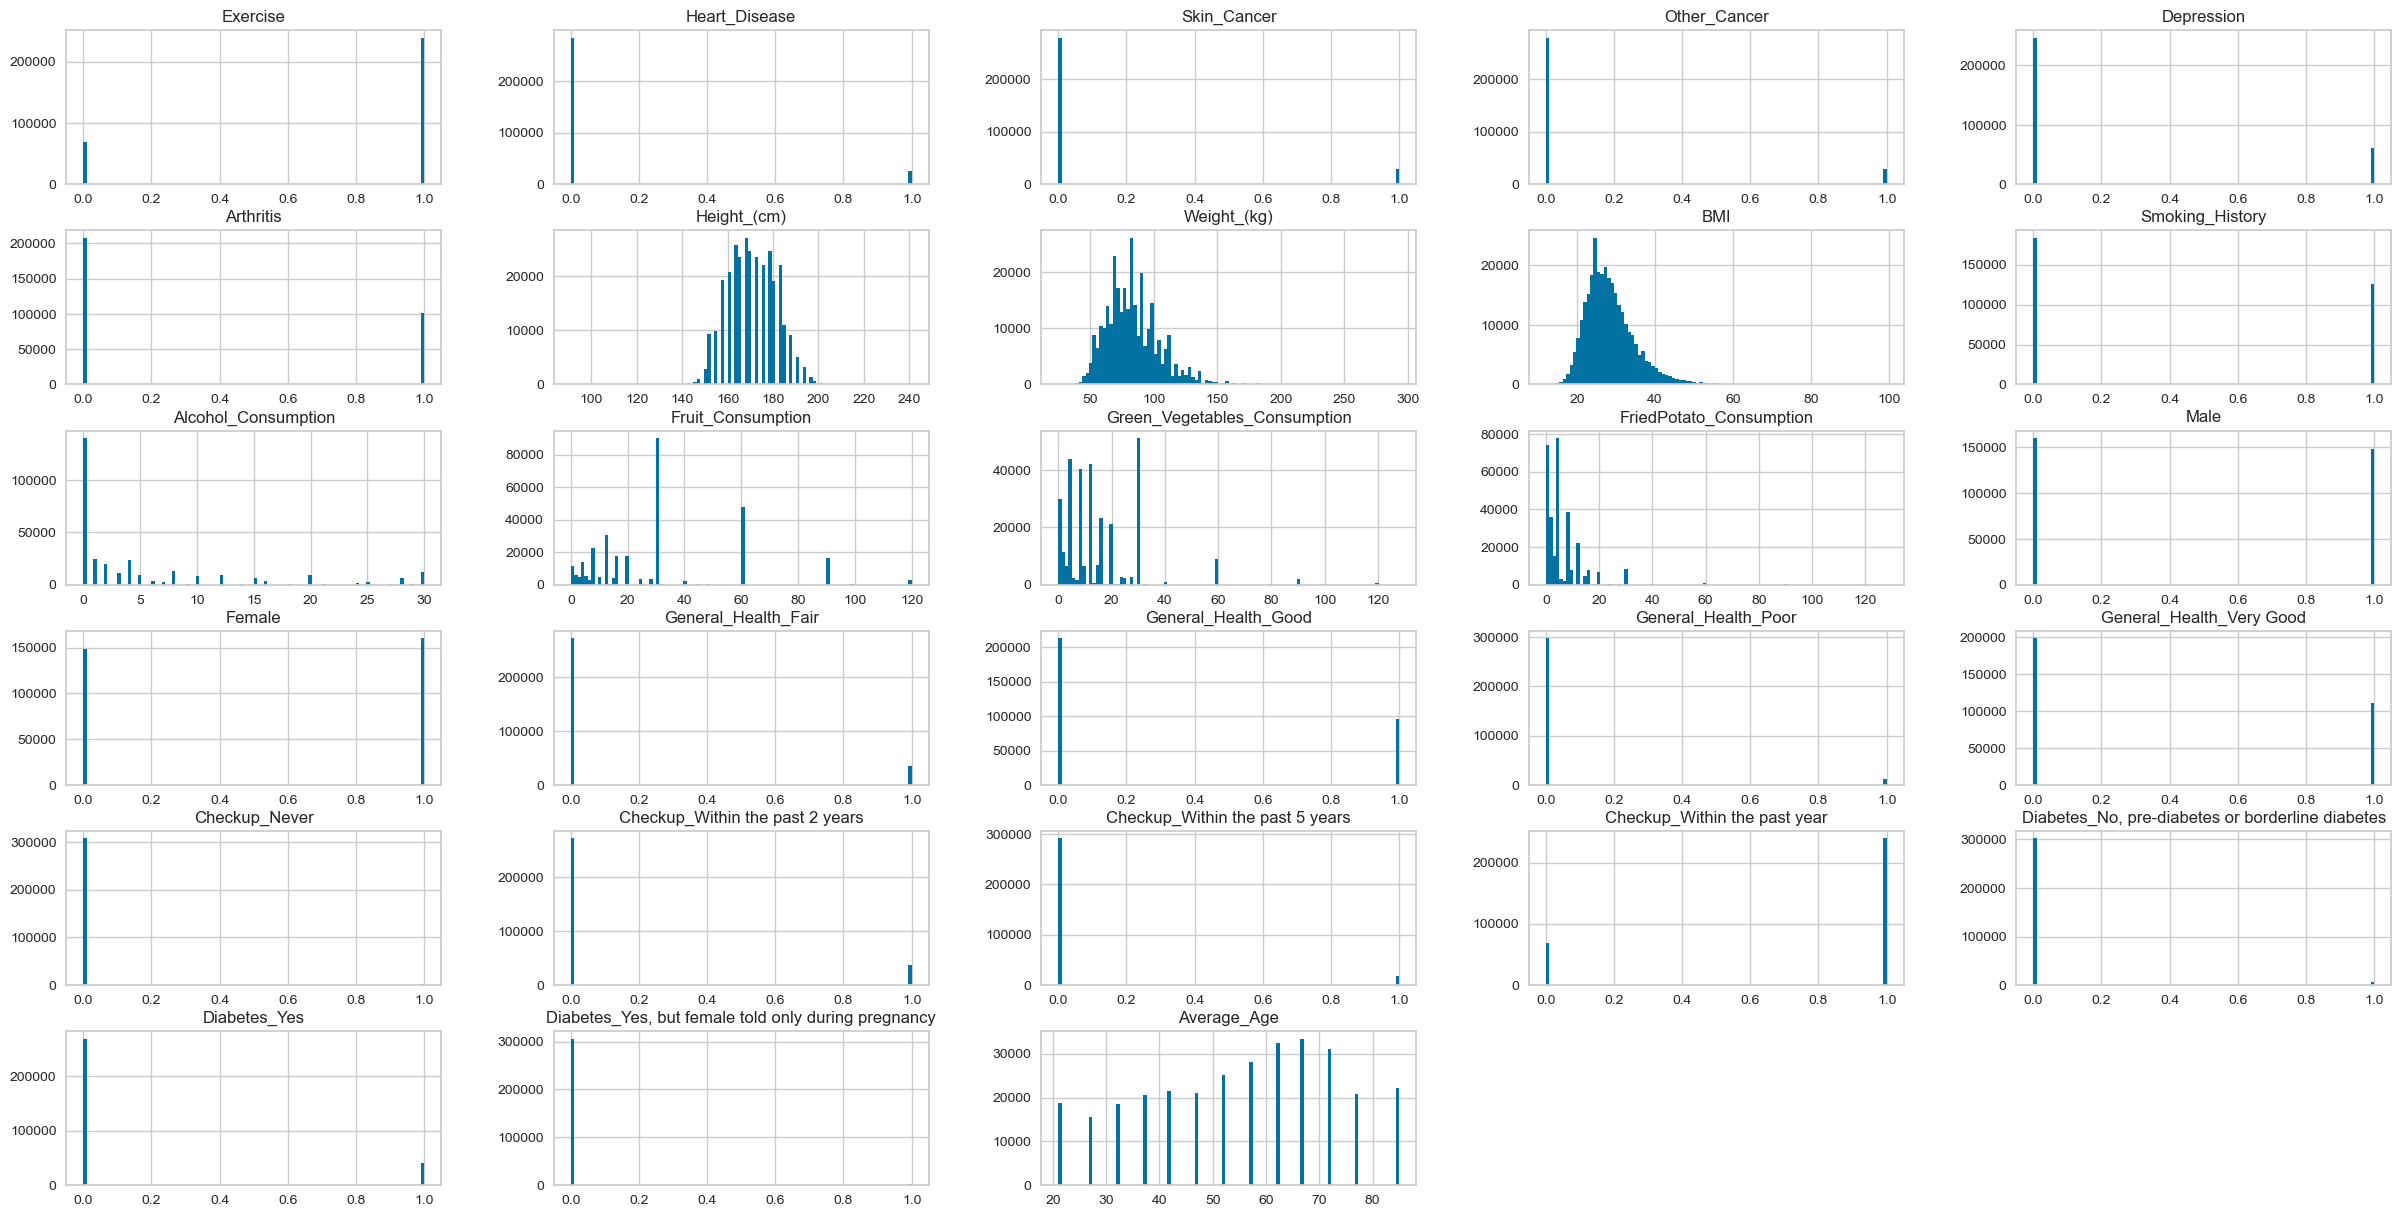

In [115]:
cardio.hist(bins=100, figsize = [30, 15])

# Correlation Heatmap beacuse who doesn't like a good heatmap

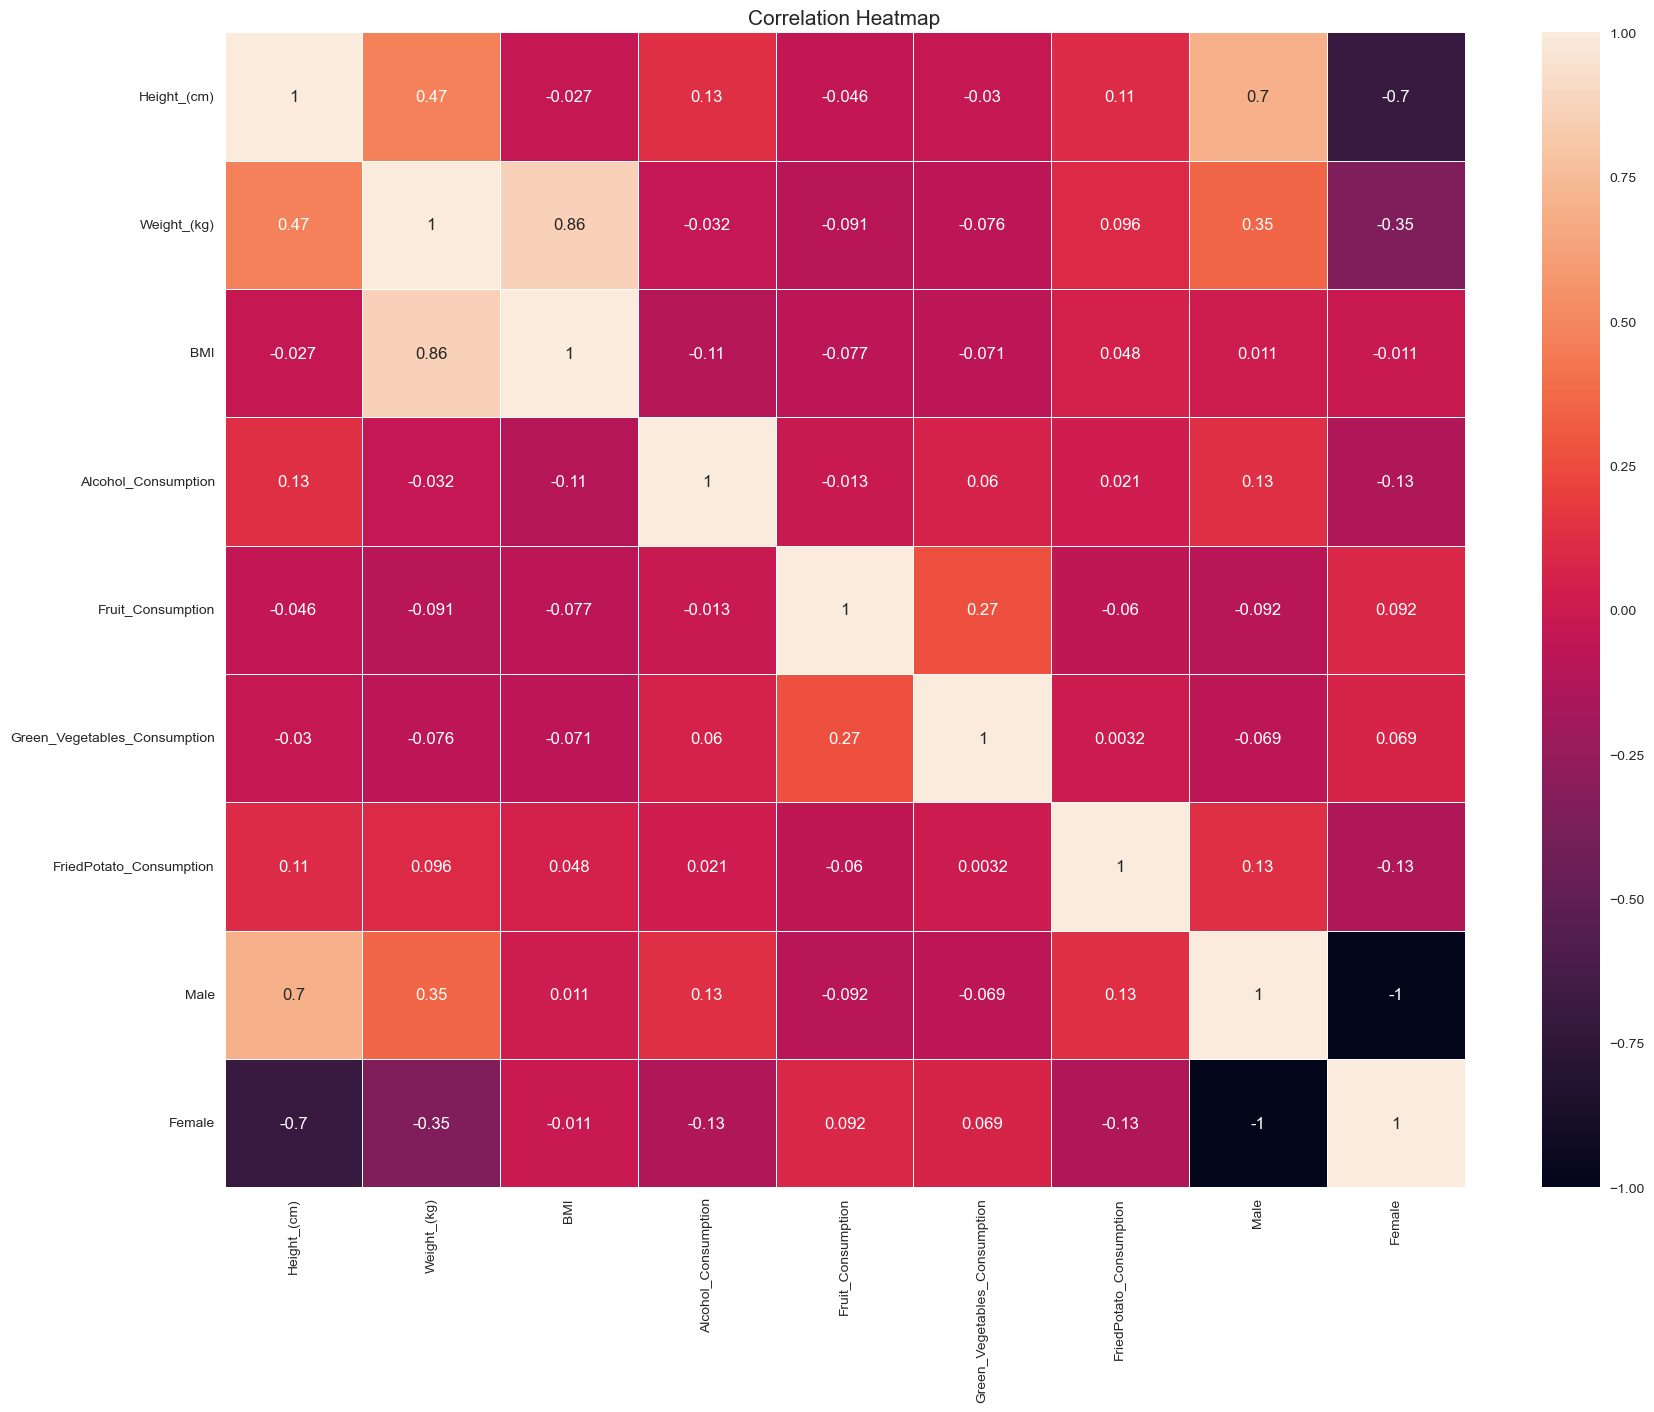

In [78]:
plt.figure(figsize = (20, 15))
sns.heatmap((cardio).corr(), annot = True, linewidths=.5, vmin = -1, vmax = 1)
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

# Onward to the Regression! Let's do this Logistically

In [116]:

y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create the logistic regression model
logit_model = LogisticRegression()

# Train the logistic regression model on the training data
logit_model.fit(X_train, y_train)

# Perform k-fold cross-validation (let's say k=5)
k_folds = 10
scores = cross_val_score(logit_model, X_train, y_train, cv=k_folds, scoring='roc_auc')

# Print the performance metrics for each fold
print("ROC-AUC scores for each fold:")
print(scores)

# Calculate and print the average and standard deviation of the ROC-AUC scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"\nAverage ROC-AUC: {mean_score:.2f} (±{std_score:.2f})")

# Make predictions on the testing data using the trained model
y_pred = logit_model.predict(X_test)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

# Convert predicted probabilities to binary (0 or 1)
y_pred_binary = (y_pred_proba >= 0.5).astype(int)

# Evaluate the model's performance on the testing data using multiple metrics
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC on Testing Data: {test_roc_auc:.2f}")

# Get the classification report with multiple scores (precision, recall, F1-score, support)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred))


ValueError: could not convert string to float: 'female'

# Confusion Matrix Heatmap

In [80]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['No' 'Yes'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

# ROC - AUC

In [81]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

ValueError: y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

## Let's Add the Standard Scaler

In [82]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import roc_curve

# Split the data into features (X) and target (y)
X = cardio.drop(columns=['Heart_Disease'])
y = cardio['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to the features to have no variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model and trained on the training data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(cv_scores)

# Predict on the test set and calculate ROC-AUC score for testing data. Model evaluated on test data
# threshold = 0.32
y_pred = logreg.predict_proba(X_test_scaled)[:, 1] # > threshold
roc_auc_test = roc_auc_score(y_test, y_pred)

# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))

# Print the classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred_binary))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {average_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()





ValueError: could not convert string to float: 'Very Good'

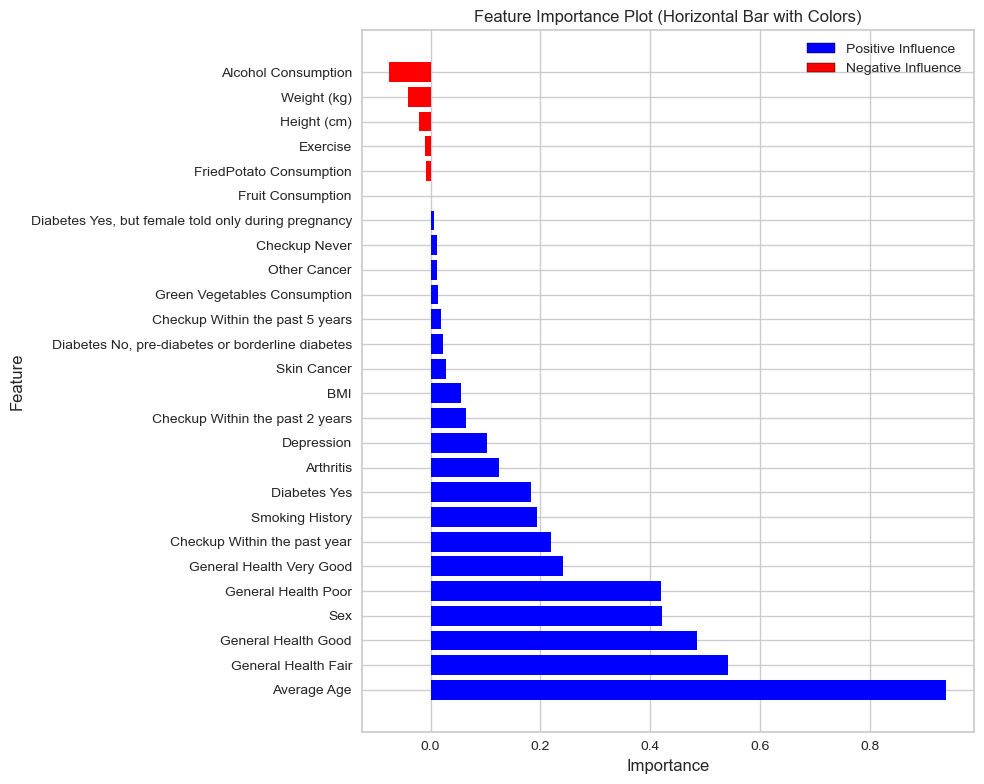

<Figure size 800x550 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Get feature names from your cardio dataset
feature_names = cardio.drop(columns=['Heart_Disease']).columns

# Get feature importances from the fitted logistic regression model
feature_importances = logreg.coef_[0]

# Sort features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Remove underscores from feature names
sorted_feature_names = [name.replace('_', ' ') for name in sorted_feature_names]

# Create a list of colors for the bars
colors = ['blue' if imp > 0 else 'red' for imp in sorted_importances]

# Create a horizontal bar chart of feature importances with different colors
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center', color=colors)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Horizontal Bar with Colors)')
plt.tight_layout()

# Create custom legend handles with distinct colors
legend_handles = [Patch(facecolor='blue', edgecolor='black', label='Positive Influence'),
                  Patch(facecolor='red', edgecolor='black', label='Negative Influence')]

# Add the custom legend handles
plt.legend(handles=legend_handles)

plt.show()
plt.savefig('Feature_Importance.png', bbox_inches='tight')

## Removed column 'Sex' and replaced with 'Male' and 'Female' columns

ROC-AUC scores for each fold:
[0.82920435 0.83279515 0.83585646 0.83095389 0.82392017 0.82633944
 0.83160882 0.83084593 0.82136144 0.82162464]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.84

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56774
           1       0.50      0.07      0.12      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.53      0.54     61771
weighted avg       0.89      0.92      0.89     61771



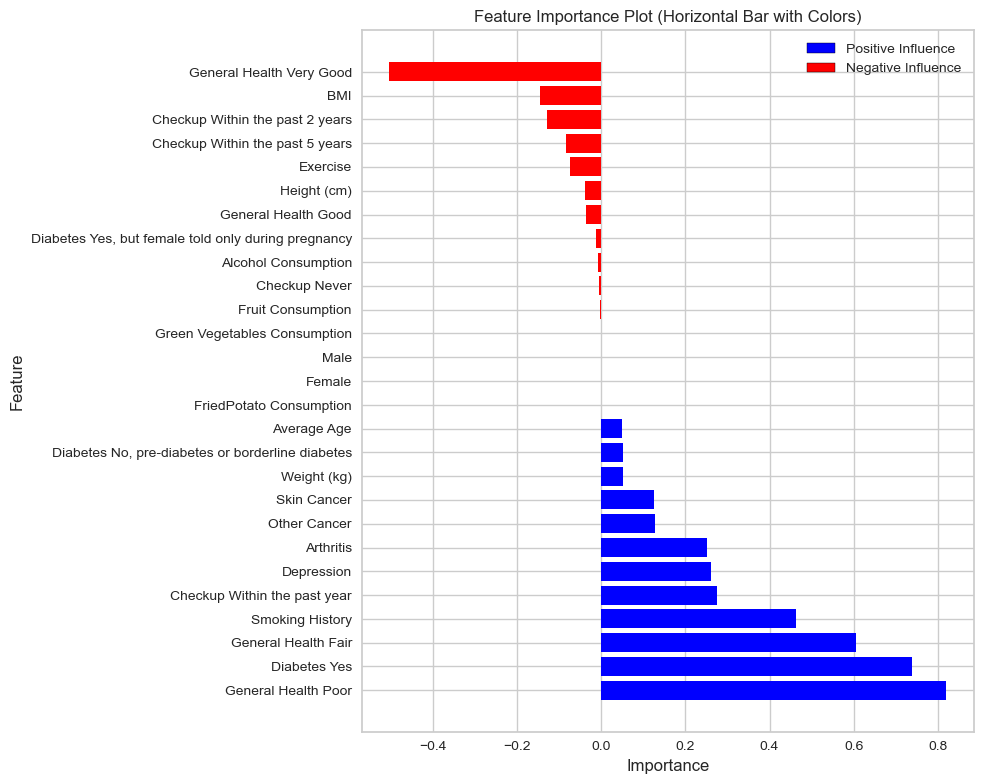

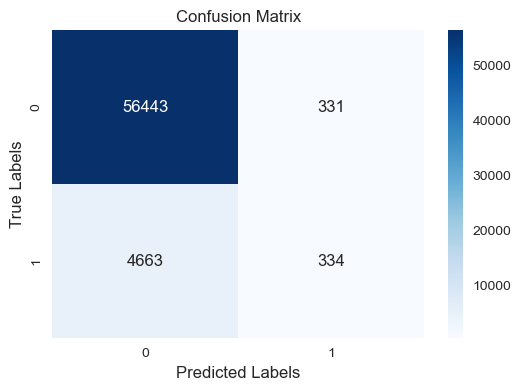

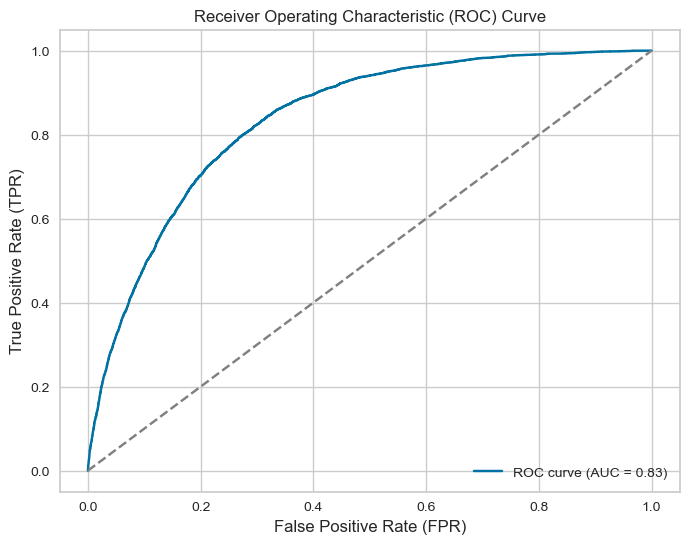

In [23]:
# Create new binary columns for 'Male' and 'Female'
cardio['Male'] = (cardio['Sex'] == 'Male').astype(int)
cardio['Female'] = (cardio['Sex'] == 'Female').astype(int)

# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease', 'Sex'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply standard scaling to the features to have no variance ##
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression model
logit_model = LogisticRegression()

# Train the logistic regression model on the training data
logit_model.fit(X_train, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring='roc_auc')

## from other
# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))

# Print the classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred_binary))

# Get feature names from cardio dataset
feature_names = X.columns

# Get feature importances from the fitted logistic regression model
feature_importances = logit_model.coef_[0]

# Sort features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Remove underscores from feature names
sorted_feature_names = [name.replace('_', ' ') for name in sorted_feature_names]

# Create a list of colors for the bars
colors = ['blue' if imp > 0 else 'red' for imp in sorted_importances]

# Create a horizontal bar chart of feature importances with different colors
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center', color=colors)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Horizontal Bar with Colors)')
plt.tight_layout()

# Create custom legend handles with distinct colors
legend_handles = [Patch(facecolor='blue', edgecolor='black', label='Positive Influence'),
                  Patch(facecolor='red', edgecolor='black', label='Negative Influence')]

# Add the custom legend handles
plt.legend(handles=legend_handles)

plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {average_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Add classification report

In [24]:
# Classification report on testing data
# y_pred_binary = (y_pred >= 0.5).astype(int)
# classification_report_data = classification_report(y_test, y_pred_binary, output_dict=True)
# classification_report_df = pd.DataFrame(classification_report_data).transpose()

## Let's do a Box Plot

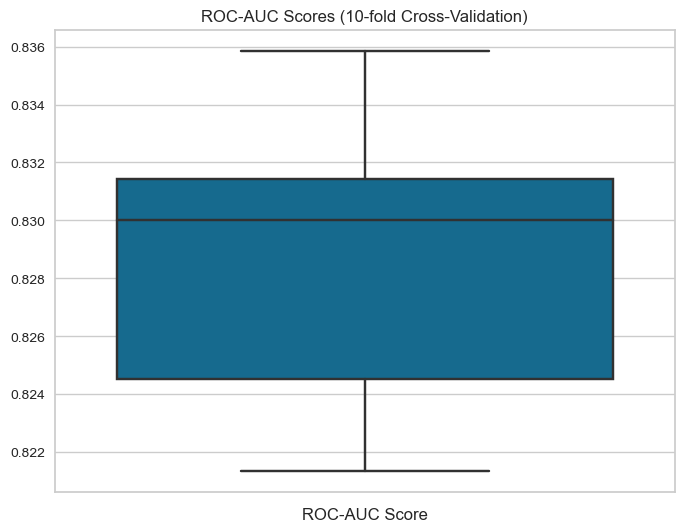

In [25]:
# Box plot for ROC-AUC scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores)
plt.title("ROC-AUC Scores (10-fold Cross-Validation)")
plt.xlabel("ROC-AUC Score")
plt.show()

## Classification Report and a Bar Graph

ROC-AUC scores for each fold:
[0.82920435 0.83279515 0.83585646 0.83095389 0.82392017 0.82633944
 0.83160882 0.83084593 0.82136144 0.82162464]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.84

Classification Report on Testing Data:
              precision    recall  f1-score       support
0              0.923690  0.994170  0.957635  56774.000000
1              0.502256  0.066840  0.117980   4997.000000
accuracy       0.919153  0.919153  0.919153      0.919153
macro avg      0.712973  0.530505  0.537807  61771.000000
weighted avg   0.889598  0.919153  0.889710  61771.000000


<Figure size 800x600 with 0 Axes>

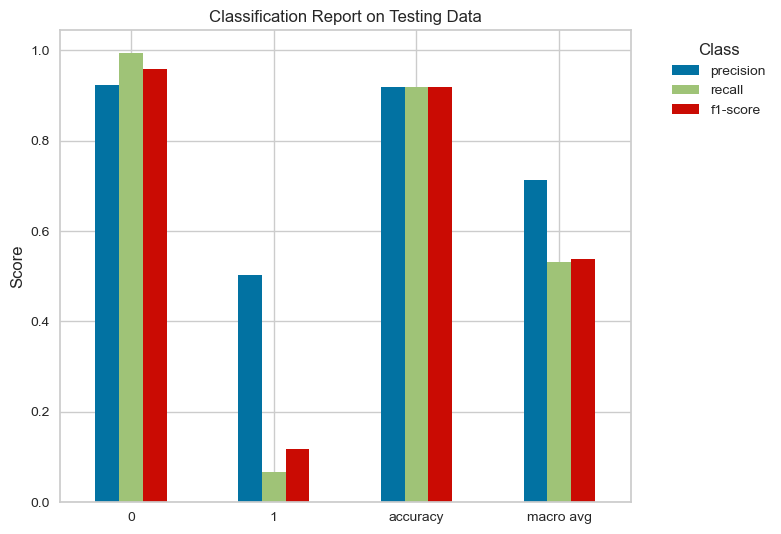

In [26]:
# Classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
classification_report_data = classification_report(y_test, y_pred_binary, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_data).transpose()
# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))
print("\nClassification Report on Testing Data:")
print(classification_report_df)

# Bar graph for precision, recall, and f1-score
plt.figure(figsize=(8, 6))
classification_report_df.iloc[:-1, :-1].plot(kind='bar', rot=0)
plt.title("Classification Report on Testing Data")
plt.ylabel("Score")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Feature Selection

In [34]:
# Fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# Get the feature importance from the model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': logit_result.params})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.show()

Optimization terminated successfully.
         Current function value: 0.225478
         Iterations 8


LinAlgError: Singular matrix

Average_Age: 0.9387
General_Health_Fair: 0.5421
General_Health_Good: 0.4852
Sex: 0.4211
General_Health_Poor: 0.4199
General_Health_Very Good: 0.2406
Checkup_Within the past year: 0.2190
Smoking_History: 0.1944
Diabetes_Yes: 0.1827
Arthritis: 0.1253
Depression: 0.1027
Alcohol_Consumption: -0.0748
Checkup_Within the past 2 years: 0.0653
BMI: 0.0561
Weight_(kg): -0.0419
Skin_Cancer: 0.0278
Diabetes_No, pre-diabetes or borderline diabetes: 0.0218
Height_(cm): -0.0202
Checkup_Within the past 5 years: 0.0191
Green_Vegetables_Consumption: 0.0140
Other_Cancer: 0.0121
Checkup_Never: 0.0118
Exercise: -0.0096
FriedPotato_Consumption: -0.0085
Diabetes_Yes, but female told only during pregnancy: 0.0070
Fruit_Consumption: 0.0017


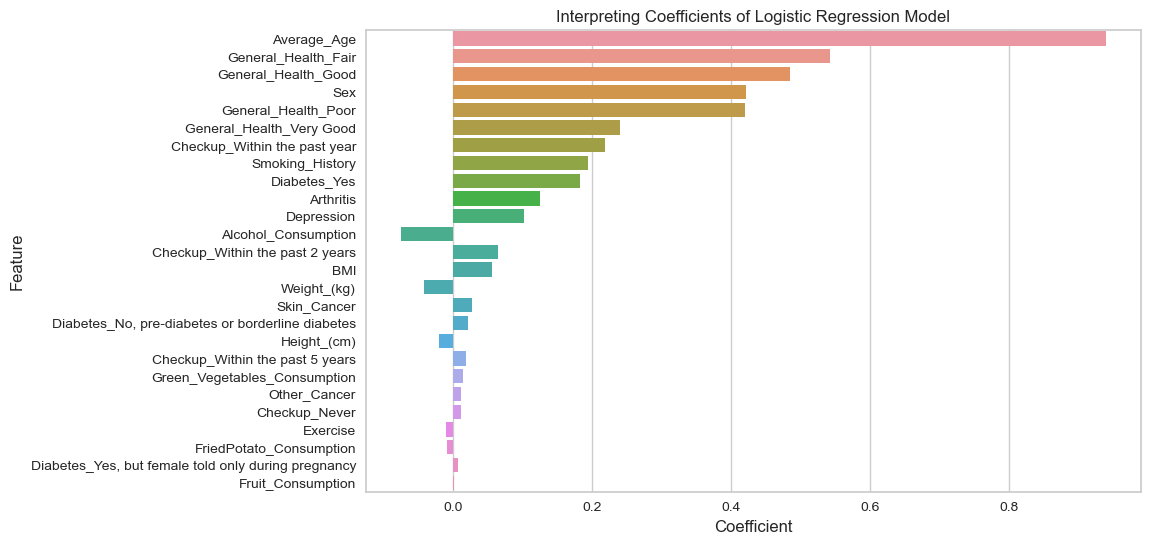

In [ ]:
# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients and their interpretation
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to highlight the most important features
coeff_df['Abs_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)

# Print the interpretation of the coefficients
for index, row in coeff_df.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.4f}")

# Optionally, you can plot the coefficients to visualize their magnitudes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, orient='h')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Interpreting Coefficients of Logistic Regression Model')
plt.show()

### A different Confusion Matrix

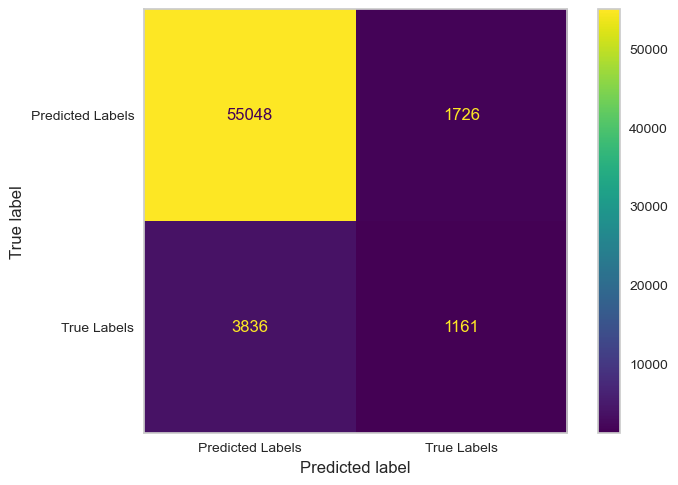

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#change label value to match your target categories.  0 is first
labels= ['Predicted Labels', 'True Labels']
#change threshold to tweak how the model predicts.
threshold = 0.32
y_pred = logreg.predict_proba(X_test_scaled)[:, 1] > threshold
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.grid(None)
plt.show()

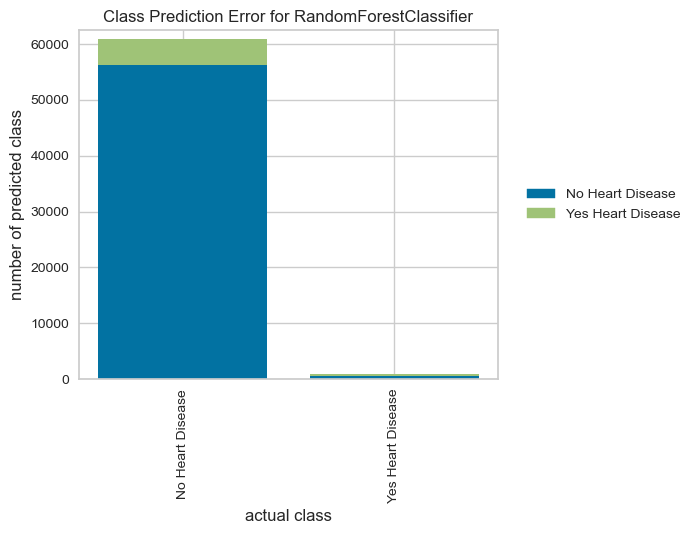

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
classes = ['No Heart Disease', 'Yes Heart Disease']
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10), classes=classes
)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show()

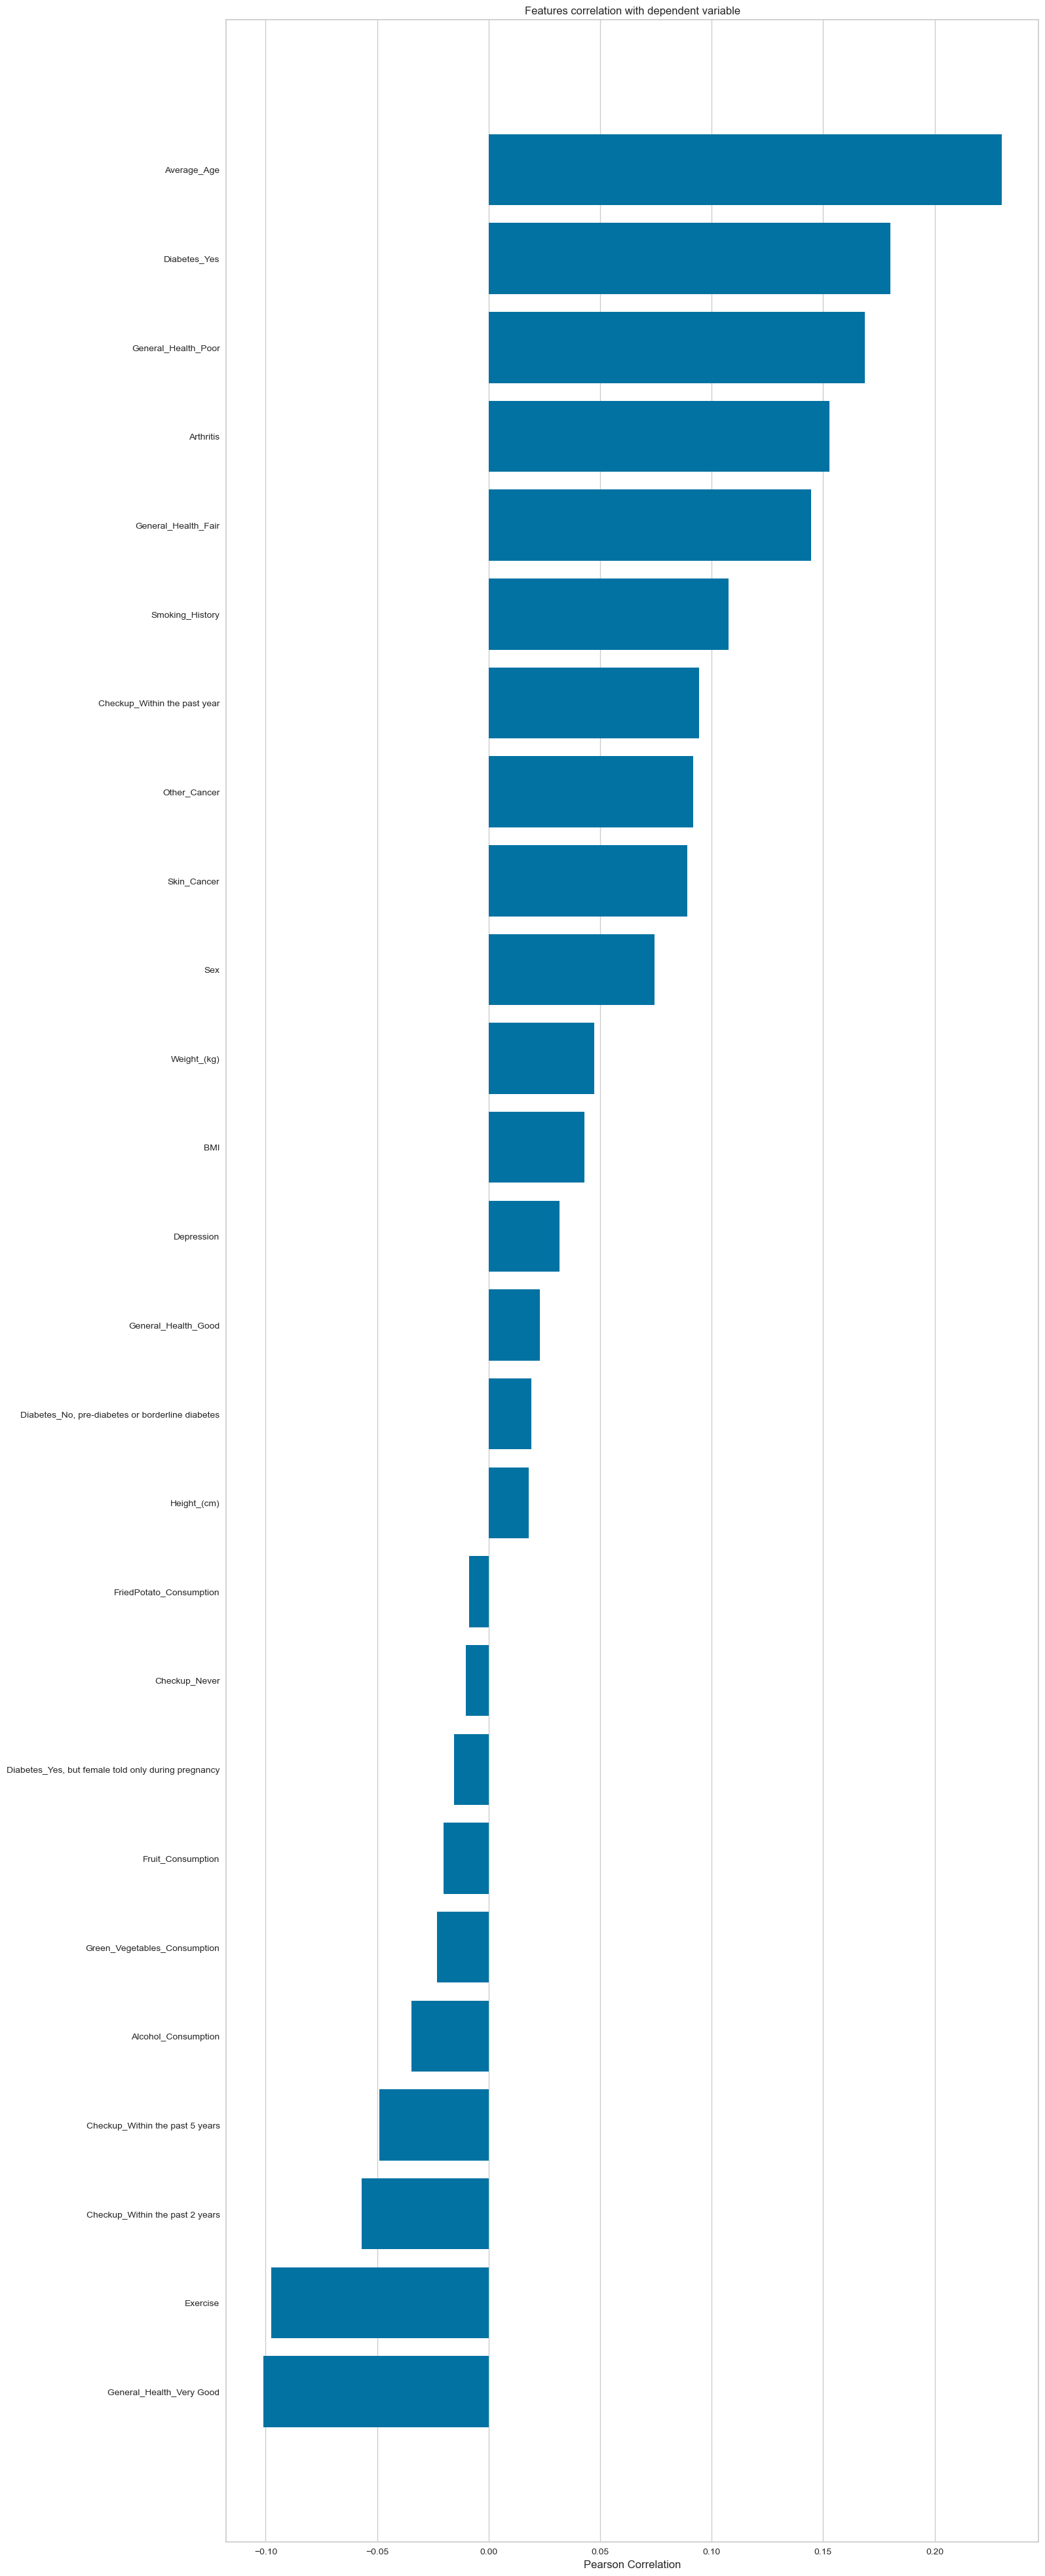

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation
fig, ax = plt.subplots(figsize= (16, 50))
viz = FeatureCorrelation(sort= True)
viz.fit(X_train, y_train)
viz.show()

ROC-AUC scores for each fold:
[0.83222244 0.83238784 0.82172591 0.82940874 0.82097884]

Average ROC-AUC: 0.83 (±0.01)

ROC-AUC on Testing Data: 0.83

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56774
           1       0.50      0.06      0.11      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.53      0.53     61771
weighted avg       0.89      0.92      0.89     61771



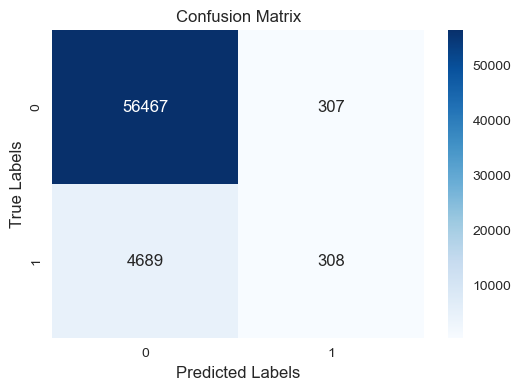

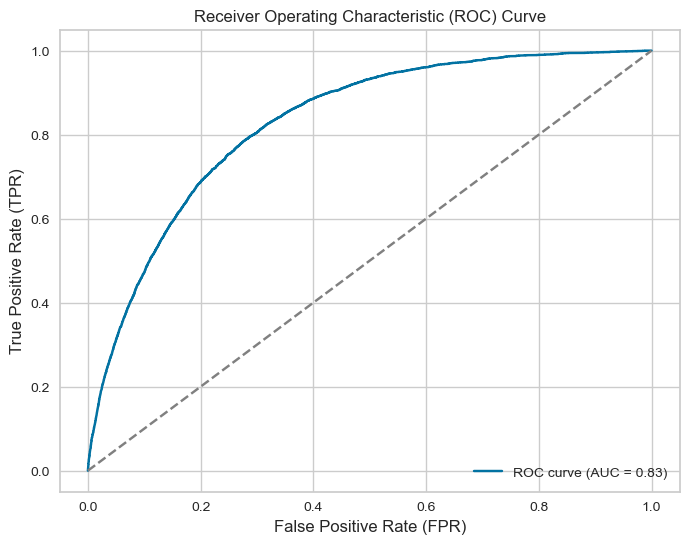

In [38]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create the logistic regression model
logit_model = LogisticRegression()

# Train the logistic regression model on the training data
logit_model.fit(X_train, y_train)

# Perform k-fold cross-validation (let's say k=5)
k_folds = 5
scores = cross_val_score(logit_model, X_train, y_train, cv=k_folds, scoring='roc_auc')

# Print the performance metrics for each fold
print("ROC-AUC scores for each fold:")
print(scores)

# Calculate and print the average and standard deviation of the ROC-AUC scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print(f"\nAverage ROC-AUC: {mean_score:.2f} (±{std_score:.2f})")

# Make predictions on the testing data using the trained model
y_pred = logit_model.predict(X_test)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance on the testing data using multiple metrics
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC on Testing Data: {test_roc_auc:.2f}")

# Get the classification report with multiple scores (precision, recall, F1-score, support)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred))

# Create a heatmap of the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Weighted the Regression. The Confusion results are different, ROC is the same.

ROC-AUC scores for each fold:
[0.83565314 0.84008078 0.84220108 0.83715832 0.83096434 0.83410539
 0.83718731 0.83631466 0.82806215 0.82694546]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.70


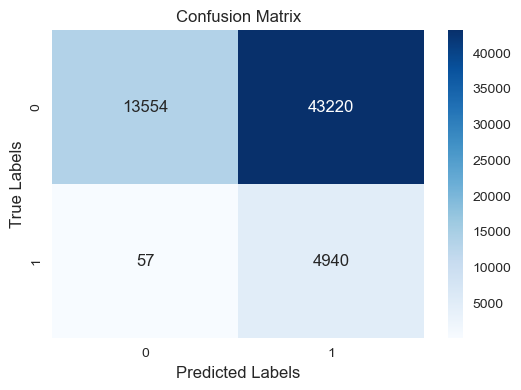

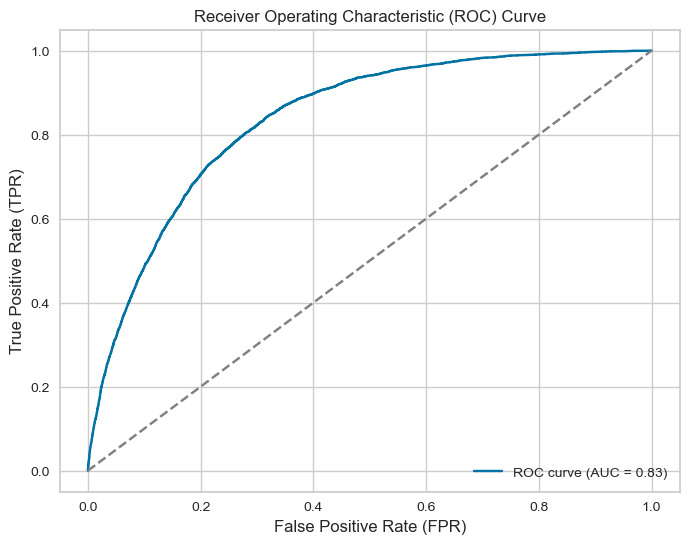

ROC-AUC scores for each fold:
[0.83565314 0.84008078 0.84220108 0.83715832 0.83096434 0.83410539
 0.83718731 0.83631466 0.82806215 0.82694546]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.70

Classification Report on Testing Data:
              precision    recall  f1-score       support
0              0.995812  0.238736  0.385139  56774.000000
1              0.102575  0.988593  0.185865   4997.000000
accuracy       0.299396  0.299396  0.299396      0.299396
macro avg      0.549193  0.613665  0.285502  61771.000000
weighted avg   0.923553  0.299396  0.369018  61771.000000


<Figure size 800x600 with 0 Axes>

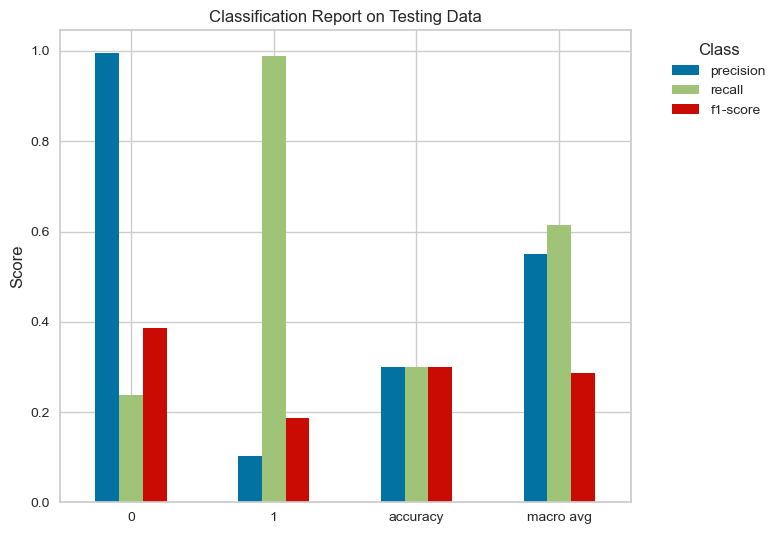

In [39]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import roc_curve

# Split the data into features (X) and target (y)
X = cardio.drop(columns=['Heart_Disease'])
y = cardio['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply standard scaling to the features to have no variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model and trained on the training data added class weight
logreg = LogisticRegression(random_state=42, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(cv_scores)

# Predict on the test set and calculate ROC-AUC score for testing data. Model evaluated on test data
# Adjust the threshold for prediction
threshold = 0.1  # You can experiment with different threshold values
y_pred = (logreg.predict_proba(X_test_scaled)[:, 1] > threshold).astype(int)

# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))

# Print the classification report on testing data
# y_pred_binary = (y_pred >= 0.5).astype(int)
# print("\nClassification Report on Testing Data:")
# print(classification_report(y_test, y_pred_binary))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve with the adjusted threshold
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve with the adjusted threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {average_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
# ==============================================================================
# Classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
classification_report_data = classification_report(y_test, y_pred_binary, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_data).transpose()
# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))
print("\nClassification Report on Testing Data:")
print(classification_report_df)

# Bar graph for precision, recall, and f1-score
plt.figure(figsize=(8, 6))
classification_report_df.iloc[:-1, :-1].plot(kind='bar', rot=0)
plt.title("Classification Report on Testing Data")
plt.ylabel("Score")
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

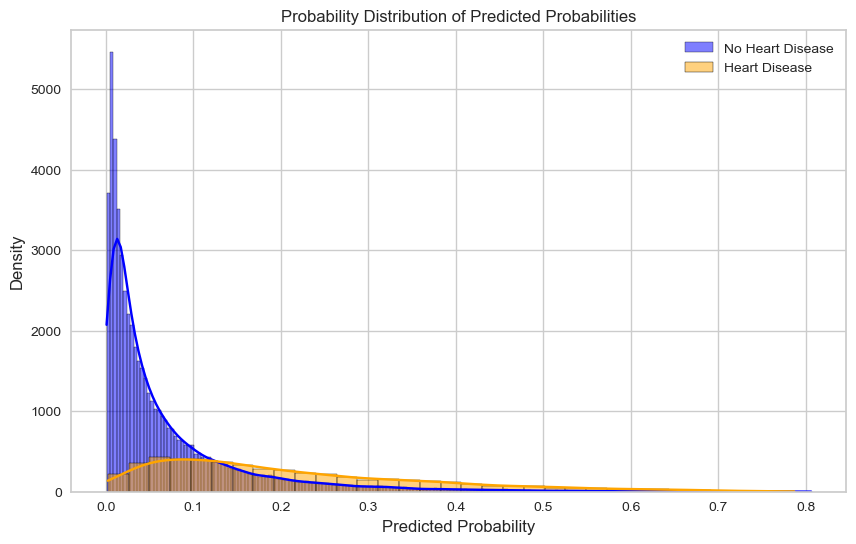

In [ ]:
# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create the logistic regression model
logit_model = LogisticRegression()

# Train the logistic regression model on the training data
logit_model.fit(X_train, y_train)

# Make predictions on the testing data using the trained model
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

# Create a probability distribution plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba[y_test == 0], kde=True, label="No Heart Disease", color='blue')
sns.histplot(y_pred_proba[y_test == 1], kde=True, label="Heart Disease", color='orange')

plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.title("Probability Distribution of Predicted Probabilities")
plt.legend()
plt.show()


ROC-AUC scores for each fold:
[0.82920435 0.83279515 0.83585646 0.83095389 0.82392017 0.82633944
 0.83160882 0.83084593 0.82136144 0.82162464]

Average ROC-AUC: 0.83 (±0.00)

ROC-AUC on Testing Data: 0.70

Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       0.97      0.66      0.78     56774
           1       0.16      0.74      0.26      4997

    accuracy                           0.66     61771
   macro avg       0.56      0.70      0.52     61771
weighted avg       0.90      0.66      0.74     61771



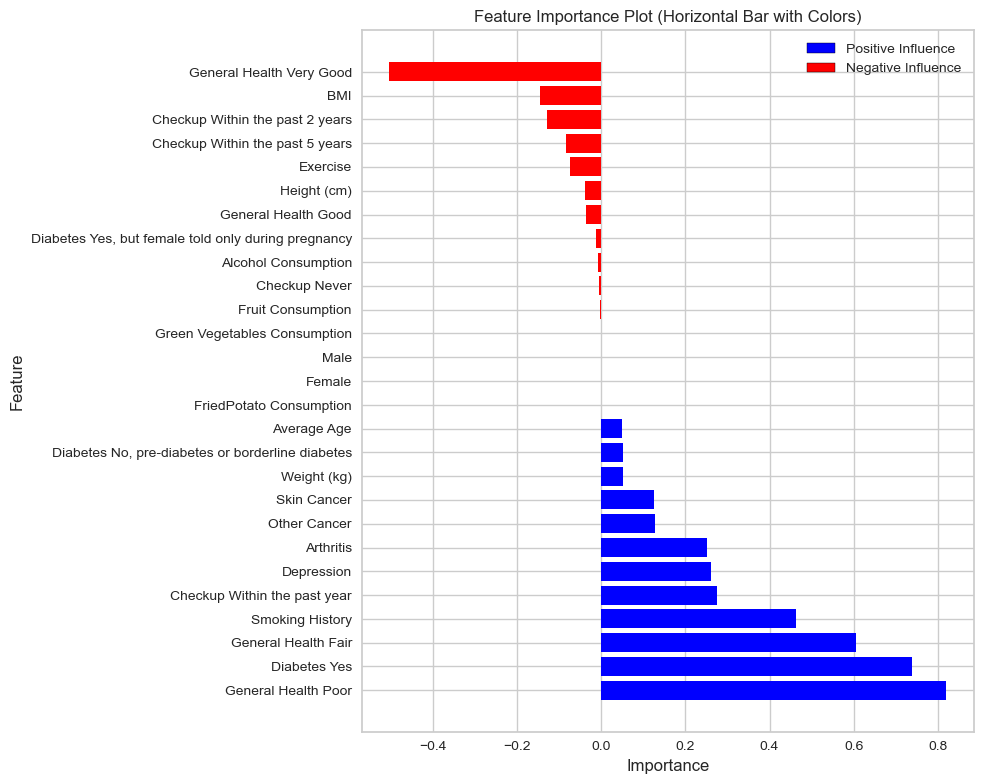

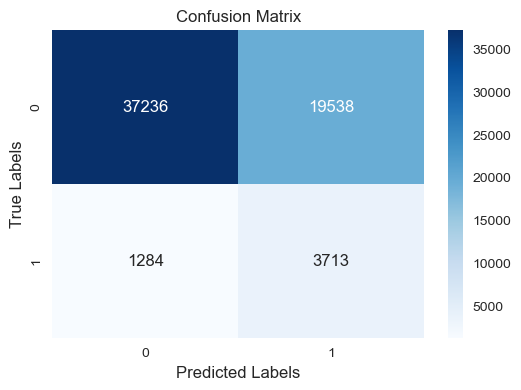

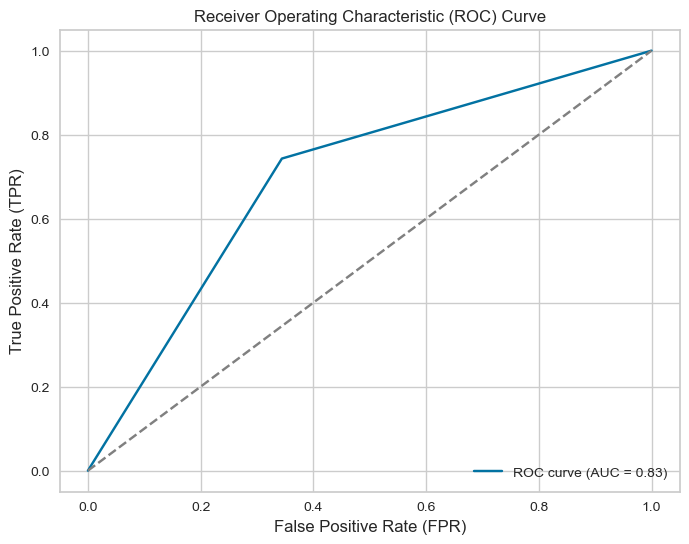

In [33]:
from matplotlib.patches import Patch
# The Logistic Regression Code
# Create new binary columns for 'Male' and 'Female'
cardio['Male'] = (cardio['Sex'] == 'Male').astype(int)
cardio['Female'] = (cardio['Sex'] == 'Female').astype(int)

# Define the dependent variable (target) and independent variables (features)
y = cardio['Heart_Disease']  # Dependent variable
X = cardio.drop(columns=['Heart_Disease', 'Sex'])  # Independent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Apply standard scaling to the features to have no variance ##
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression model
logit_model = LogisticRegression()

# Train the logistic regression model on the training data
logit_model.fit(X_train, y_train)

# Perform k-fold cross-validation with 10 folds
cv_scores = cross_val_score(logit_model, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = np.mean(cv_scores)

# Predict on the test set and calculate ROC-AUC score for testing data. Model evaluated on test data
threshold = 0.5
y_pred = logit_model.predict_proba(X_test_scaled)[:, 1]  > threshold
roc_auc_test = roc_auc_score(y_test, y_pred)

# Print the results
print("ROC-AUC scores for each fold:")
print(cv_scores)
print("\nAverage ROC-AUC: {:.2f} (±{:.2f})".format(average_roc_auc, np.std(cv_scores)))
print("\nROC-AUC on Testing Data: {:.2f}".format(roc_auc_test))

# Print the classification report on testing data
y_pred_binary = (y_pred >= 0.5).astype(int)
print("\nClassification Report on Testing Data:")
print(classification_report(y_test, y_pred_binary))

# Get feature names from cardio dataset
feature_names = X.columns

# Get feature importances from the fitted logistic regression model
feature_importances = logit_model.coef_[0]

# Sort features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Remove underscores from feature names
sorted_feature_names = [name.replace('_', ' ') for name in sorted_feature_names]

# Create a list of colors for the bars
colors = ['blue' if imp > 0 else 'red' for imp in sorted_importances]

# Create a horizontal bar chart of feature importances with different colors
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center', color=colors)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Horizontal Bar with Colors)')
plt.tight_layout()

# Create custom legend handles with distinct colors
legend_handles = [Patch(facecolor='blue', edgecolor='black', label='Positive Influence'),
                  Patch(facecolor='red', edgecolor='black', label='Negative Influence')]

# Add the custom legend handles
plt.legend(handles=legend_handles)

plt.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {average_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()